# **TRABAJO FINAL**

---



1. Definir el problema de la naturaleza que se tiene a continuación, además de los
objetivos de negocio bien definidos.
2. ¿Qué tipo de variables se utilizan en el problema de negocio?
3. Hacer un resumen global del total de variables de estudio (Análisis Descriptivo
Detallado), principalmente a nivel univariado, entendiendo globalmente la
problemática en la cual estoy inmerso.
4. De acuerdo al objetivo de negocio planteado, realizar un análisis de asociación
o correlación comentando y documentando sus posibles hallazgos.
5. Realizar el modelo predictivo y validar los resultados.

**DOCENTE**
*   Jorge Brian Alarcon Flores

**INTEGRANTES**

1.   Santiago Lopez Tello
2.   Christian Cuellar
3.   Fabrizio Giulio Biagioni Casafranca
4.   Angela Patricia Rodas Ramírez
5.   Maderick Valenzuela




**PROBLEMAS Y OBJETIVOS**

---

**Definición del problema:**

El **problema** que enfrenta la empresa X es la disminución en el ratio de contactabilidad de los leads en la gestión de cobranzas, que ha pasado de un 34% de contactos existosos a un 30%, lo que ha resultado en una reducción en el monto recuperado y un aumento en los costos de las llamadas outbound. 

**Objetivo de negocio:**

Por lo tanto, el **objetivo de la empresa X** es recuperar la mayor cantidad de deuda y reducir el costo de las llamadas.

**¿Cómo lograr el objetivo beneficia a mi empresa?**

De esa manera, la empresa se **beneficiaría** manteniendo satisfechas a las empresas contratantes e incrementando los beneficios propios como porcentaje del ingreso. 

**¿Cómo lograr el objetivo?**

Alcanzaremos el objetivo mejorando el ratio de contactabilidad mediante el análisis de las ultimas campañas en busca de conclusiones que permitan identificar a los clientes con alta probabilidad de contactabilidad.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ContactoCobranza.csv.csv to ContactoCobranza.csv.csv


In [ ]:
Cobranza = pd.read_csv(io.BytesIO(uploaded['ContactoCobranza.csv.csv']),encoding='latin-1', sep = ';')

**VARIABLES**

---



In [ ]:
Cobranza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MES           8458 non-null   int64  
 1   CLIENTE       8458 non-null   object 
 2   NRO_VEC_COB   6376 non-null   object 
 3   PDPs_ROTAS    8458 non-null   object 
 4   ESTADO_PDP    8458 non-null   int64  
 5   NRO_CUOTAS    7779 non-null   object 
 6   MES_0         8458 non-null   float64
 7   MES_1         8458 non-null   float64
 8   MES_2         7557 non-null   float64
 9   FECHALLAMADA  8458 non-null   object 
 10  HORA          8458 non-null   float64
 11  DEUDA_TOTAL   8458 non-null   float64
 12  ESTATUS       8458 non-null   object 
 13  ACTIVACION    8458 non-null   float64
 14  MORA          8458 non-null   float64
 15  TIPOCONTACTO  8458 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
Cobranza.nunique()

MES                3
CLIENTE         8458
NRO_VEC_COB        2
PDPs_ROTAS         2
ESTADO_PDP         2
NRO_CUOTAS         3
MES_0           6382
MES_1           3520
MES_2           2209
FECHALLAMADA      61
HORA              14
DEUDA_TOTAL     6590
ESTATUS            1
ACTIVACION         5
MORA               2
TIPOCONTACTO       2
dtype: int64

In [ ]:
Cobranza.head()

,MES,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ESTATUS,ACTIVACION,MORA,TIPOCONTACTO
0,201402,C00001,NaN,0,0,"<24, 48]",244.86,0.00,245.26,03/02/2014,15.0,3816.34,BT,2012.0,1.0,COEF
1,201402,C00002,<=10,0,0,>48,610.58,612.69,611.54,18/02/2014,9.0,13620.50,BT,2012.0,1.0,COEF
2,201402,C00003,<=10,>0,0,"<24, 48]",2138.73,0.00,NaN,05/02/2014,16.0,18968.50,BT,2013.0,0.0,CNE
3,201402,C00004,>10,0,0,"<24, 48]",323.07,46.85,74.26,24/02/2014,19.0,2459.84,BT,2012.0,0.0,CNE
4,201402,C00005,<=10,0,0,"<24, 48]",920.54,0.00,0.00,12/02/2014,14.0,6591.76,BT,2013.0,0.0,CNE


La base de datos cuenta con 16 variables de las cuales 

4 hacen referencia a fecha y hora: 

1.   **ACTIVACION**  Año en elque inicio el cliente en la empresa 
2.   **FECHALLAMADA** Es la fecha exacta en la cual se hizo la llamada
3.   **MES** El año y el mes en el que se hizo la llamada
4.   **HORA** Hace referencia a la hora en que se intento contactar al cliente

5 variables hacen referencia a comportamiento crediticio/cobranza del cliente

1. **NRO_VEC_COB** Numero de veces que el cliente cayo en cobranza
2. **PDPs_ROTAS** Numero de promesas que el cliente hizo sin cumplir
3. **ESTADO_PDP** Estado de promesa de pago(0: sin promesa; 1: con promesa temprana; 2: con promesa tardia; 3: con promesa rota)
4. **NRO_CUOTAS** Numero de cuotas adeudadas
5. **MORA**  Estado de mora( 1: Normal, 0: Deficiente )

4 hacen referencia a montos adeudados:

1. **MES_0** Deuda vencida actual
2. **MES_1** Deuda vencida hace un mes
3. **MES_2** Deuda vencida hace dos meses
4. **DEUDA_TOTAL** Deuda total al cierre de mes

2 variables hacen referencia al cliente: 

1. **CLIENTE** codigo de identificacion del cliente
2. **ESTATUS** BT = Titulares; OTROS = No titulares

Finalmente la variable objetivo o target: 

**TIPOCONTACTO** KPI que mide si el contacto fue exitoso o no (COEF = exitoso; CNE= no exitoso )




 


**ANALISIS DESCRIPTIVO**

---



In [ ]:
Cobranza[['MES_0','MES_1','MES_2','DEUDA_TOTAL','HORA']].describe()

,MES_0,MES_1,MES_2,DEUDA_TOTAL,HORA
count,8458.000000,8458.000000,7557.000000,8458.000000,8458.000000
mean,610.169318,382.406377,262.465285,11545.004608,12.153819
std,596.445662,602.298309,598.076285,12518.449635,3.743409
min,20.150000,0.000000,0.000000,546.090000,7.000000
25%,239.847500,0.000000,0.000000,3710.582500,9.000000
50%,422.550000,135.315000,0.000000,7317.535000,11.000000
75%,762.360000,556.440000,306.940000,14696.775000,15.000000
max,4905.990000,5909.180000,8791.910000,79984.000000,20.000000


In [ ]:
num_features = ['MES_0','MES_1','MES_2','DEUDA_TOTAL','HORA']

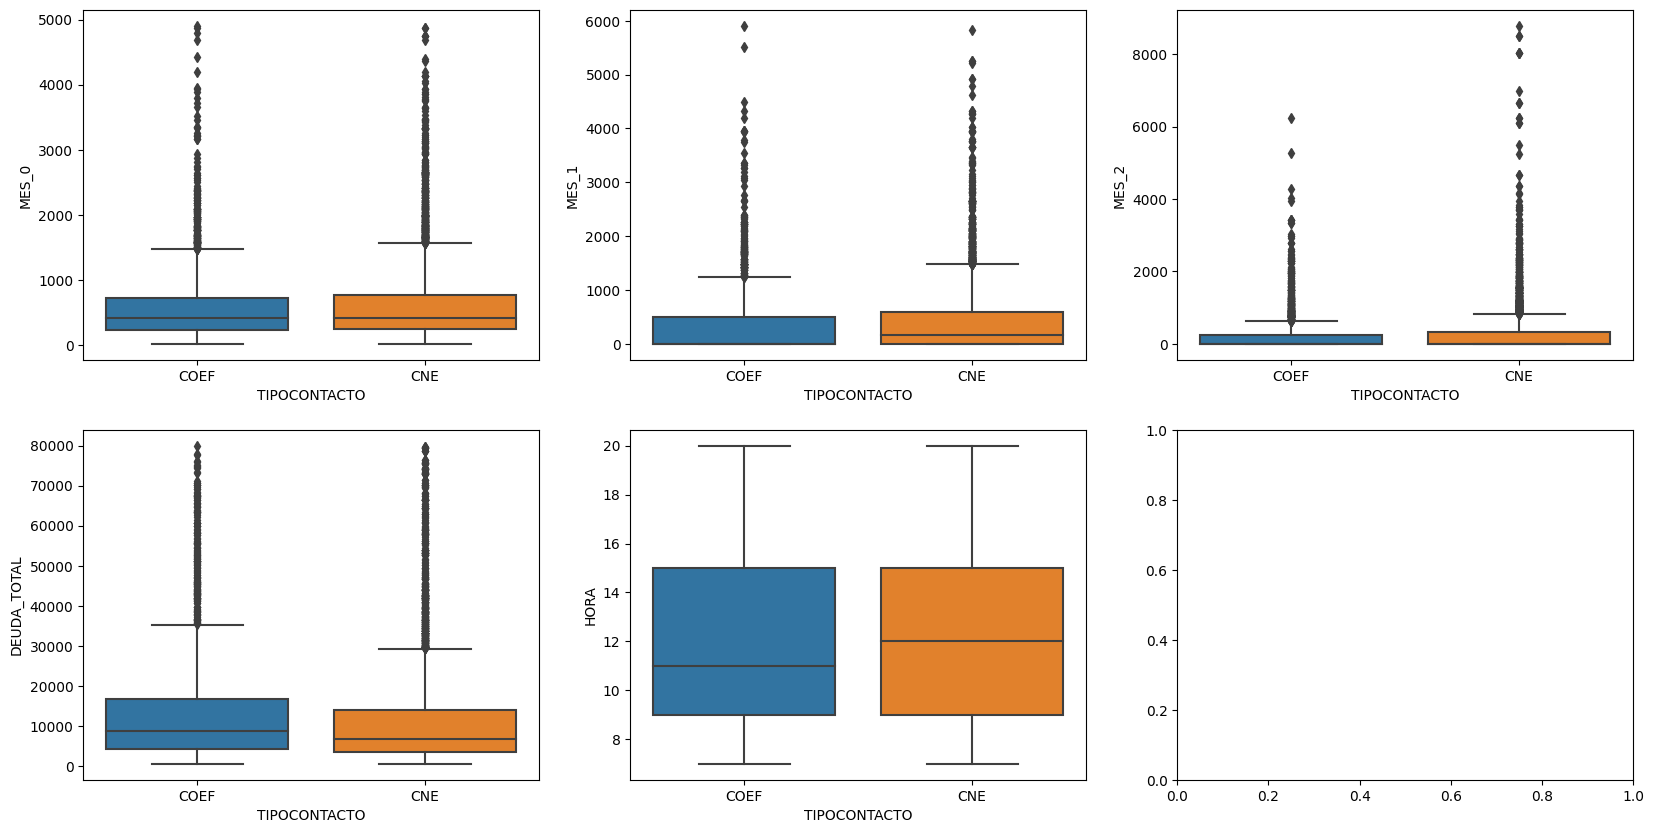

In [ ]:
_, axss = plt.subplots(2, 3, figsize=[20, 10])
for i in range(len(num_features)):
    sns.boxplot(x='TIPOCONTACTO', y=num_features[i], data=Cobranza, ax=axss[i//3][i%3])

In [ ]:
cat_features = ['NRO_VEC_COB', 'PDPs_ROTAS', 'ESTADO_PDP', 'NRO_CUOTAS',"MORA"]

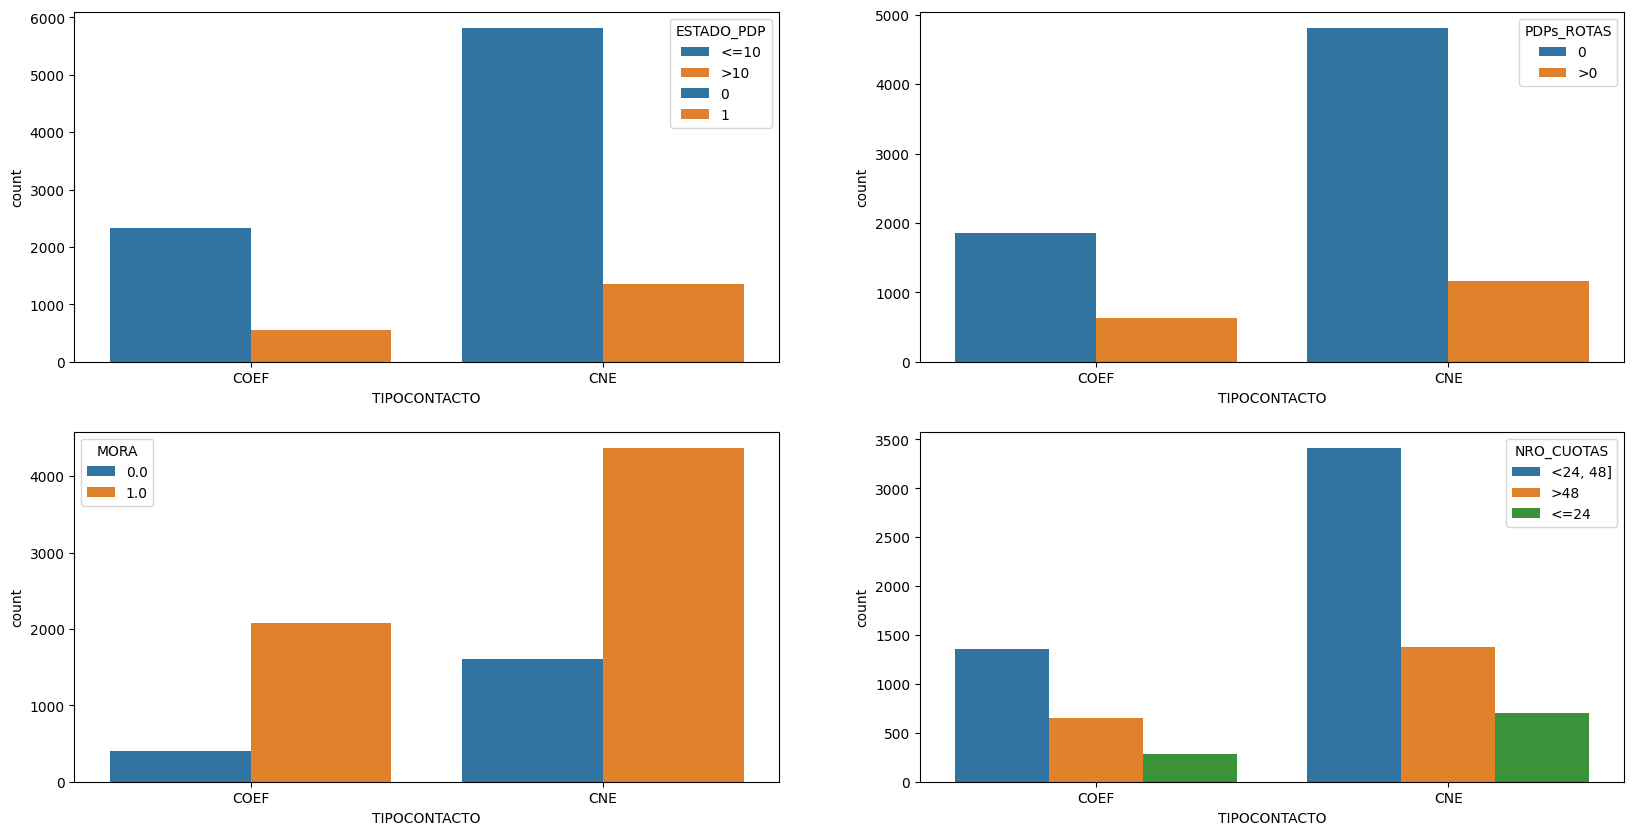

In [ ]:
_, axss = plt.subplots(2, 2, figsize=[20, 10])
for i in range(len(cat_features)):
    sns.countplot(x='TIPOCONTACTO', hue=cat_features[i], data=Cobranza, ax=axss[i//3][i%2])

In [ ]:
Cobranza["NRO_VEC_COB"].value_counts()

<=10    4475
>10     1901
Name: NRO_VEC_COB, dtype: int64

In [ ]:
Cobranza["PDPs_ROTAS"].value_counts()

0     6661
>0    1797
Name: PDPs_ROTAS, dtype: int64

In [ ]:
Cobranza["ESTADO_PDP"].value_counts()

0    8128
1     330
Name: ESTADO_PDP, dtype: int64

In [ ]:
Cobranza["NRO_CUOTAS"].value_counts()

<24, 48]    4770
>48         2025
<=24         984
Name: NRO_CUOTAS, dtype: int64

In [ ]:
Cobranza["MORA"].value_counts()

1.0    6440
0.0    2018
Name: MORA, dtype: int64

In [ ]:
Cobranza["TIPOCONTACTO"].value_counts()

CNE     5974
COEF    2484
Name: TIPOCONTACTO, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa11596bd60>,
 [Text(0.6640866262254487, 0.8769201519343146, 'COEF'),
  Text(-0.6640866262254491, -0.8769201519343143, 'CNE')],
 [Text(0.3622290688502447, 0.47832008287326244, '29.4%'),
  Text(-0.362229068850245, -0.4783200828732622, '70.6%')])

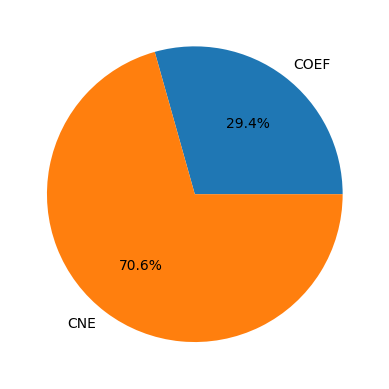

In [ ]:
ordered_labels = ["COEF", "CNE"]
value_counts = Cobranza["TIPOCONTACTO"].value_counts()[ordered_labels]

plt.pie(value_counts, autopct='%1.1f%%', labels=ordered_labels)

Aproximadamente, el 29.4% de las llamadas sí tuvo contacto efectivo.

In [ ]:
pd.crosstab(index=Cobranza['PDPs_ROTAS'],
            columns=Cobranza['TIPOCONTACTO'], margins=True).apply(lambda r: r/len(Cobranza) *100,
                                axis=1)

TIPOCONTACTO,CNE,COEF,All
PDPs_ROTAS,,,
0,56.798297,21.955545,78.753843
>0,13.833057,7.413100,21.246157
All,70.631355,29.368645,100.000000


In [ ]:
pd.crosstab(index=Cobranza['ESTADO_PDP'],
            columns=Cobranza['TIPOCONTACTO'], margins=True).apply(lambda r: r/len(Cobranza) *100,
                                axis=1)

TIPOCONTACTO,CNE,COEF,All
ESTADO_PDP,,,
0,68.656893,27.441476,96.098368
1,1.974462,1.927170,3.901632
All,70.631355,29.368645,100.000000


In [ ]:
pd.crosstab(index=Cobranza['NRO_VEC_COB'],
            columns=Cobranza['TIPOCONTACTO'], margins=True)

TIPOCONTACTO,CNE,COEF,All
NRO_VEC_COB,,,
<=10,3117,1358,4475
>10,1354,547,1901
All,4471,1905,6376


**TRANSFORMANDO LAS VARIABLES CATEGORICAS A NUMERICAS PARA OBTENER UN MEJOR ANALISIS**

In [ ]:
Cobranza["NRO_VEC_COB"] = Cobranza["NRO_VEC_COB"].replace(" ",np.nan) 
Cobranza["PDPs_ROTAS"] = Cobranza["PDPs_ROTAS"].replace(" ",np.nan)
Cobranza["NRO_CUOTAS"] = Cobranza["NRO_CUOTAS"].replace(" ",np.nan)
Cobranza["MES_2"] = Cobranza["MES_2"].replace(" ",np.nan)

Cobranza.dropna(inplace = True);

In [ ]:
Cobranza['TIPOCONTACTO'] = Cobranza['TIPOCONTACTO'].apply(lambda x: 1 if x == "COEF" else 0)
Cobranza['NRO_VEC_COB'] = Cobranza['NRO_VEC_COB'].apply(lambda x: 0 if x == "<=10" else 1 if x == ">10" else np.nan)
Cobranza['PDPs_ROTAS'] = Cobranza['PDPs_ROTAS'].apply(lambda x: 0 if x == "0" else 1)
Cobranza['NRO_CUOTAS'] = Cobranza['NRO_CUOTAS'].apply(lambda x: 12 if x == "<=24" else 36 if x == "<24, 48]" else 60 if x == ">48" else np.nan)

In [ ]:
Cobranza['MES'] = Cobranza['MES'].astype(str)
Cobranza['MES_NUM'] = Cobranza['MES'].str.slice(4, 6)
Cobranza['ANIO'] = Cobranza['MES'].str.slice(0, 4)

In [ ]:
Cobranza.head()

,MES,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ESTATUS,ACTIVACION,MORA,TIPOCONTACTO,MES_NUM,ANIO
0,201402,C00001,NaN,0,0,36.0,244.86,0.00,245.26,03/02/2014,15.0,3816.34,BT,2012.0,1.0,1,02,2014
1,201402,C00002,0.0,0,0,60.0,610.58,612.69,611.54,18/02/2014,9.0,13620.50,BT,2012.0,1.0,1,02,2014
2,201402,C00003,0.0,1,0,36.0,2138.73,0.00,NaN,05/02/2014,16.0,18968.50,BT,2013.0,0.0,0,02,2014
3,201402,C00004,1.0,0,0,36.0,323.07,46.85,74.26,24/02/2014,19.0,2459.84,BT,2012.0,0.0,0,02,2014
4,201402,C00005,0.0,0,0,36.0,920.54,0.00,0.00,12/02/2014,14.0,6591.76,BT,2013.0,0.0,0,02,2014


**ANÁLISIS UNIVARIADO**

array([[<Axes: title={'center': 'NRO_VEC_COB'}>,
        <Axes: title={'center': 'PDPs_ROTAS'}>,
        <Axes: title={'center': 'ESTADO_PDP'}>],
       [<Axes: title={'center': 'NRO_CUOTAS'}>,
        <Axes: title={'center': 'MES_0'}>,
        <Axes: title={'center': 'MES_1'}>],
       [<Axes: title={'center': 'MES_2'}>,
        <Axes: title={'center': 'HORA'}>,
        <Axes: title={'center': 'DEUDA_TOTAL'}>],
       [<Axes: title={'center': 'ACTIVACION'}>,
        <Axes: title={'center': 'MORA'}>,
        <Axes: title={'center': 'TIPOCONTACTO'}>]], dtype=object)

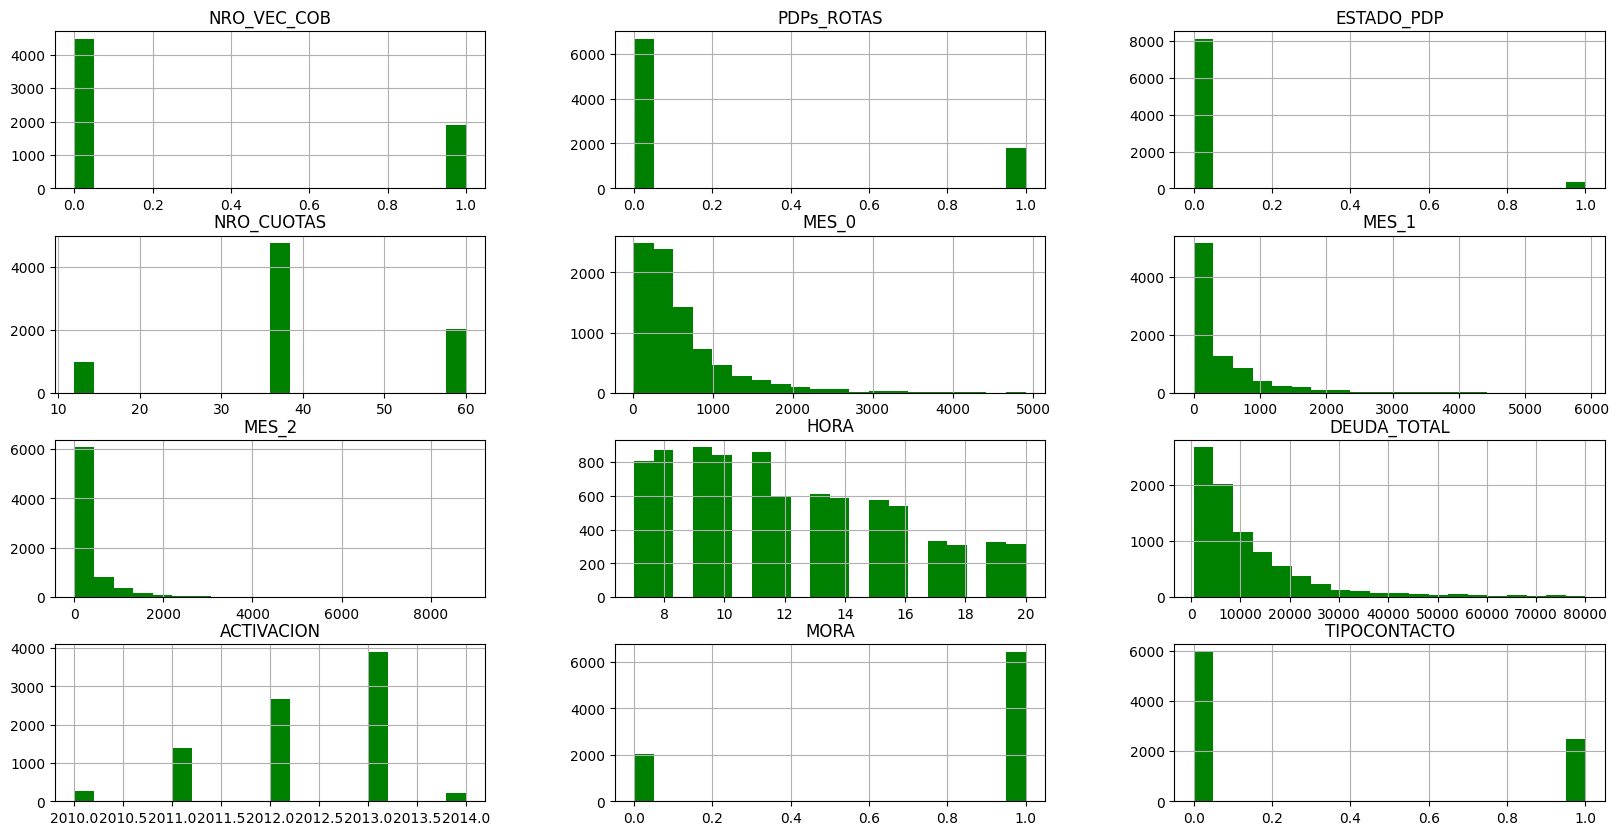

In [ ]:
Cobranza.hist(figsize=(20,10), bins=20, color="g")

<ipython-input-11-5387a191f985>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Cobranza.corr(), annot = Cobranza.corr())


<Axes: >

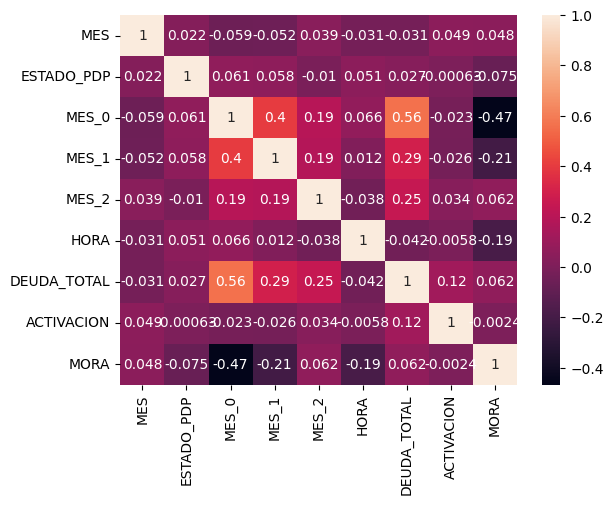

In [ ]:
sns.heatmap(Cobranza.corr(), annot = Cobranza.corr())

A simple vista, no parece haber multicolinealidad entre las variables numéricas.

In [ ]:
corr = Cobranza.corr()

<ipython-input-14-6c74febd1695>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Cobranza.corr()


In [ ]:
corr[['DEUDA_TOTAL']].sort_values(by = 'DEUDA_TOTAL', ascending = False).style.background_gradient()

,DEUDA_TOTAL
DEUDA_TOTAL,1.000000
MES_0,0.559633
MES_1,0.290600
MES_2,0.248471
ACTIVACION,0.117775
MORA,0.061509
ESTADO_PDP,0.026795
MES,-0.030522
HORA,-0.041841


<Axes: xlabel='DEUDA_TOTAL', ylabel='MES_0'>

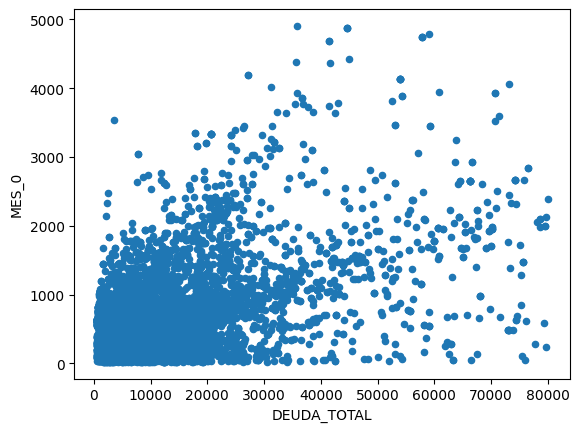

In [ ]:
Cobranza.plot.scatter(x='DEUDA_TOTAL', y='MES_0')

In [ ]:
from datetime import datetime
Cobranza["Dia_semana"]=(Cobranza["FECHALLAMADA"].isoweekday())

VARIABLES NUMERICAS SE NORMALIZAN PARA QUE SEA MAS FACIL PARA EL APRENDIZAJE DE LOS MODELOS

In [ ]:
num_cols = [x for x in Cobranza.columns if Cobranza[x].nunique()>6 and x!="CLIENTE" and x!='FECHALLAMADA' and x!='HORA' ]

In [ ]:
num_cols

['MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_log_transformed = pd.DataFrame(data = Cobranza[num_cols]) #transformamos a un formato dataframe
features_log_transformed[num_cols] = Cobranza[num_cols].apply(lambda x: np.log(x + 1)) #aplicamos una función logaritmica a la data

scaler = MinMaxScaler() #definimos la funcion de reescalamiento
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed) #transformamos a un formato dataframe
features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols]) #aplicamos la función de reescalamiento

In [ ]:
features_log_minmax_transform

,MES_0,MES_1,MES_2,DEUDA_TOTAL
0,0.450381,0.000000,0.606317,0.389710
1,0.617688,0.739195,0.706653,0.644895
2,0.847620,0.000000,NaN,0.711332
3,0.501089,0.445403,0.475786,0.301635
4,0.692962,0.000000,0.000000,0.499323
...,...,...,...,...
8453,0.469450,0.000000,0.738609,0.386539
8454,0.527142,0.740818,0.000000,0.447575
8455,0.432266,0.000000,0.000000,0.398356
8456,0.802424,0.000000,NaN,0.686623


array([[<Axes: title={'center': 'MES_0'}>,
        <Axes: title={'center': 'MES_1'}>],
       [<Axes: title={'center': 'MES_2'}>,
        <Axes: title={'center': 'DEUDA_TOTAL'}>]], dtype=object)

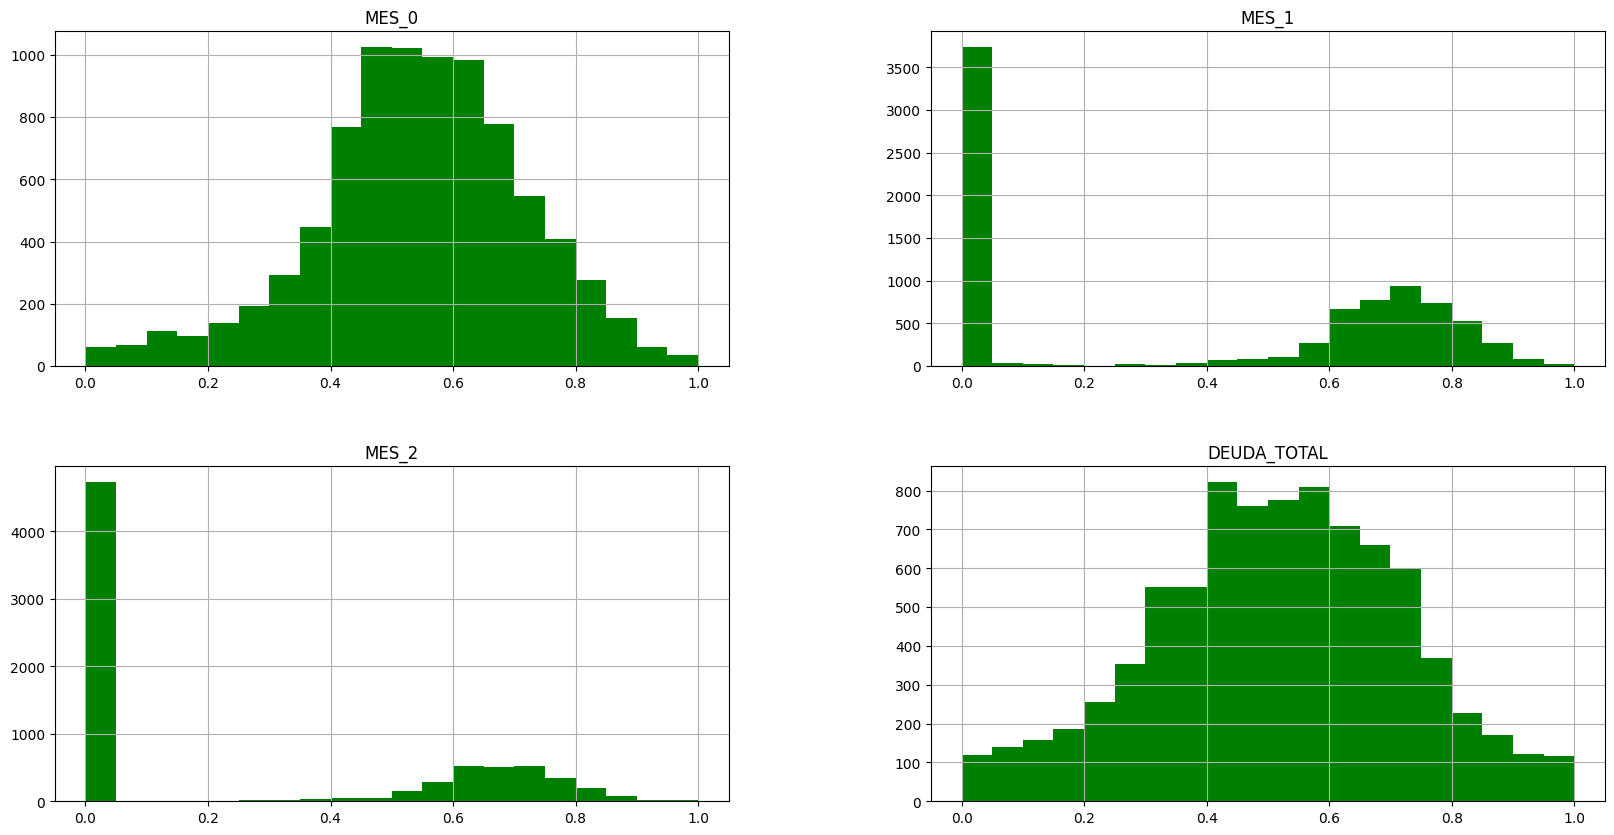

In [ ]:
features_log_minmax_transform.hist(figsize=(20,10), bins=20, color="g")

In [ ]:
Cobranza.drop(["MES_0","MES_1","MES_2","DEUDA_TOTAL"],axis = 1, inplace = True)#dejamos solo las variables categóricas
Cobranza = pd.concat([Cobranza, features_log_minmax_transform], axis=1)#Unimos las variables categóricas con las numéricas transformadas

In [ ]:
Cobranza.dropna(inplace = True)

In [ ]:
prueba =Cobranza # variable completa

In [ ]:
Cobranza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 1 to 8457
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MES           5242 non-null   object 
 1   CLIENTE       5242 non-null   object 
 2   NRO_VEC_COB   5242 non-null   float64
 3   PDPs_ROTAS    5242 non-null   int64  
 4   ESTADO_PDP    5242 non-null   int64  
 5   NRO_CUOTAS    5242 non-null   float64
 6   FECHALLAMADA  5242 non-null   object 
 7   HORA          5242 non-null   float64
 8   ESTATUS       5242 non-null   object 
 9   ACTIVACION    5242 non-null   float64
 10  MORA          5242 non-null   float64
 11  TIPOCONTACTO  5242 non-null   int64  
 12  MES_NUM       5242 non-null   object 
 13  ANIO          5242 non-null   object 
 14  MES_0         5242 non-null   float64
 15  MES_1         5242 non-null   float64
 16  MES_2         5242 non-null   float64
 17  DEUDA_TOTAL   5242 non-null   float64
dtypes: float64(9), int64(3), obj

In [ ]:
label = Cobranza["TIPOCONTACTO"]

In [ ]:
Cobranza.drop("TIPOCONTACTO",inplace = True, axis = 1) #eliminamos la variable target de la data original
Cobranza.drop("CLIENTE",inplace = True, axis = 1) #eliminamos la variable id de cliente
Cobranza.drop("FECHALLAMADA",inplace = True, axis = 1) #eliminamos la variable llamadas
Cobranza.drop("ESTATUS",inplace = True, axis = 1) #eliminamos la variable ESTATUS
Cobranza.drop("ACTIVACION",inplace = True, axis = 1) #eliminamos la variable ACTIVACION
Cobranza.drop("MES_NUM",inplace = True, axis = 1) #eliminamos la variable MES_NUM
Cobranza.drop("ANIO",inplace = True, axis = 1) #eliminamos la variable ANIO
Cobranza.drop("MES",inplace = True, axis = 1) #eliminamos la variable MES


In [ ]:
Cobranza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 1 to 8457
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NRO_VEC_COB  5242 non-null   float64
 1   PDPs_ROTAS   5242 non-null   int64  
 2   ESTADO_PDP   5242 non-null   int64  
 3   NRO_CUOTAS   5242 non-null   float64
 4   HORA         5242 non-null   float64
 5   MORA         5242 non-null   float64
 6   MES_0        5242 non-null   float64
 7   MES_1        5242 non-null   float64
 8   MES_2        5242 non-null   float64
 9   DEUDA_TOTAL  5242 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 450.5 KB


**Evaluación de Algoritmos**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Cobranza, label, test_size = 0.3)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3669 samples.
Testing set has 1573 samples.


Importamos las librerías de 5 tipos de algoritmos de clasificación:

Árboles de decisión

Regresión logística

SVC (Máquinas de soporte vectorial)

XgBoost

Random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha
    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)
    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['CNE', 'COEF']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['CNE', 'COEF']); #distribución de los resultados en la matriz de confusión del eje y

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions))) #mostrar resultados
    
    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("Area under ROC curve : ",roc_auc,"\n") #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--') #código del formato de la gráfica
    plt.xlim([0, 1]) #dimensión del eje x
    plt.ylim([0, 1]) #dimensión del eje y
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('Receiver operating characteristic') #título del gráfico
    plt.legend(loc="lower right") # para mostrar como leyenda el cálculo del auc en el gráfico


 Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1107
           1       0.35      0.37      0.36       466

    accuracy                           0.61      1573
   macro avg       0.54      0.54      0.54      1573
weighted avg       0.62      0.61      0.61      1573

Area under ROC curve :  0.5419908812822034 



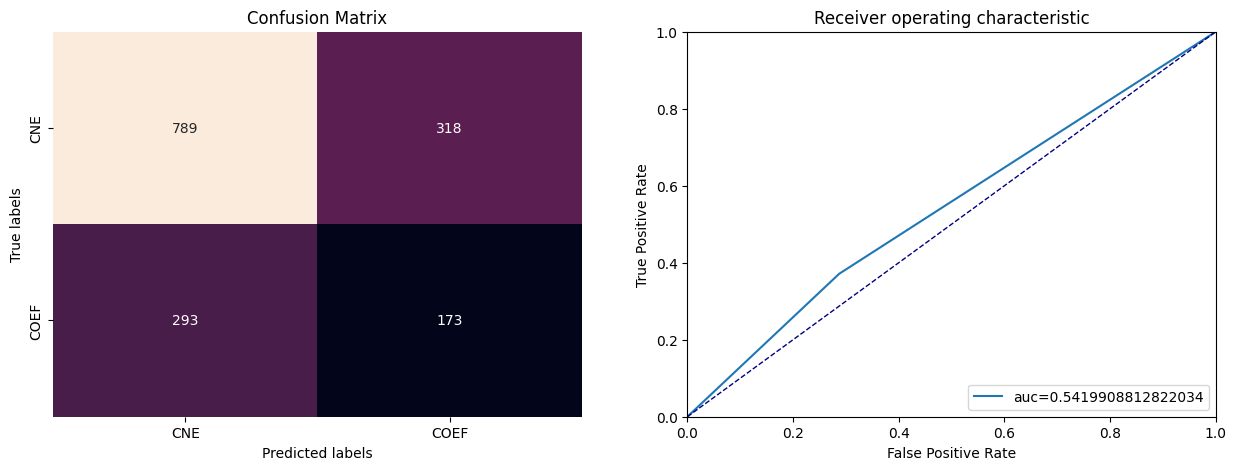

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.97      0.82      1107
           1       0.37      0.04      0.08       466

    accuracy                           0.69      1573
   macro avg       0.54      0.51      0.45      1573
weighted avg       0.61      0.69      0.60      1573

Area under ROC curve :  0.5061024072329421 



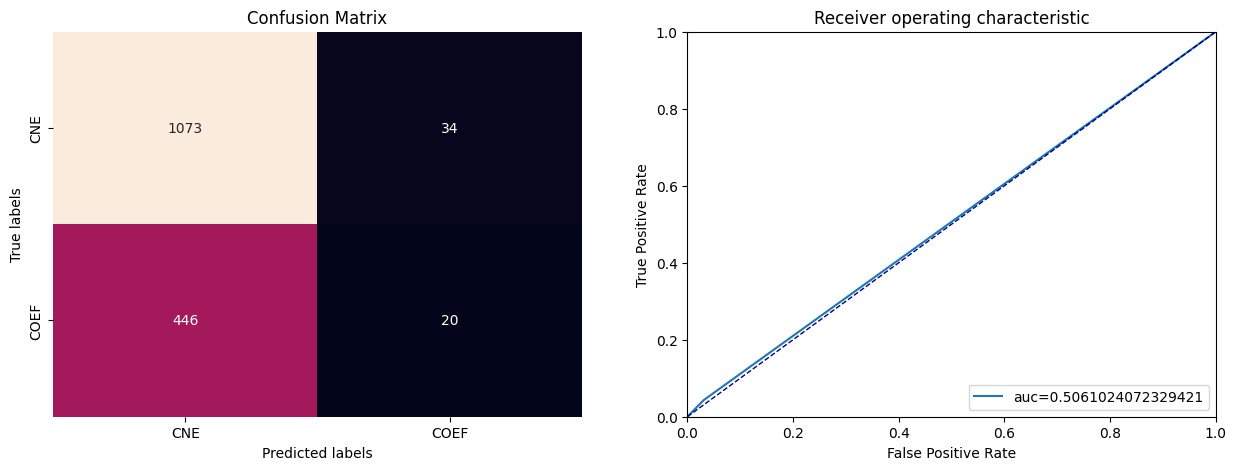

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Classification report : 
               precision    recall  f1-score   support

           0       0.70      1.00      0.83      1107
           1       0.00      0.00      0.00       466

    accuracy                           0.70      1573
   macro avg       0.35      0.50      0.41      1573
weighted avg       0.50      0.70      0.58      1573

Area under ROC curve :  0.5 



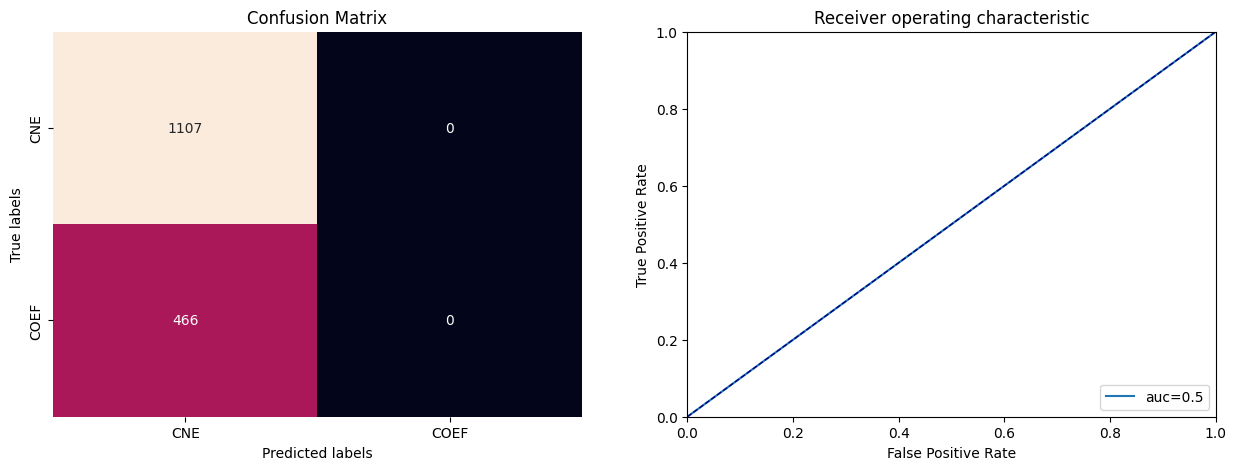

In [ ]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.89      0.80      1107
           1       0.41      0.18      0.25       466

    accuracy                           0.68      1573
   macro avg       0.57      0.54      0.52      1573
weighted avg       0.63      0.68      0.64      1573

Area under ROC curve :  0.5363798845427654 



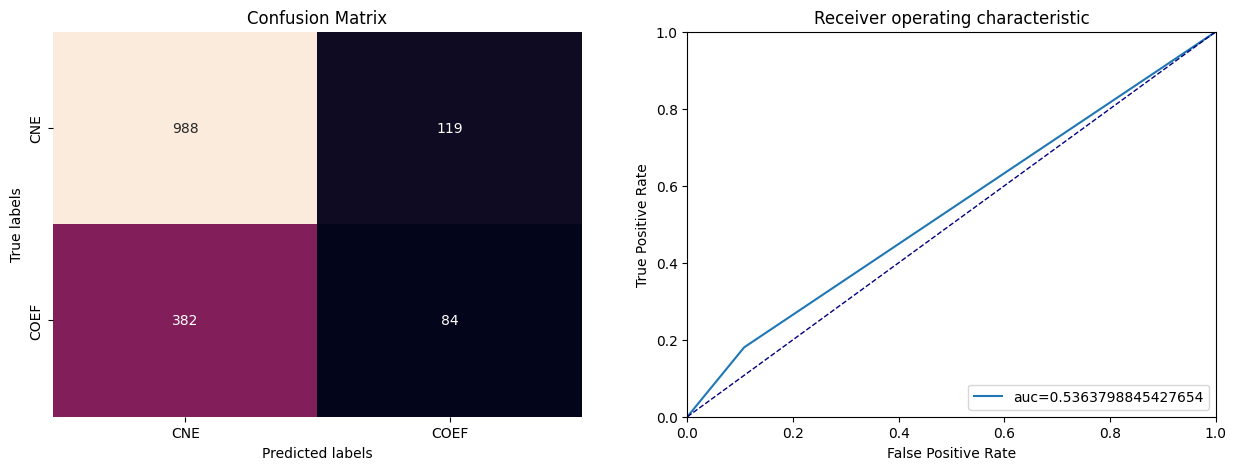

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.86      0.79      1107
           1       0.40      0.22      0.28       466

    accuracy                           0.67      1573
   macro avg       0.56      0.54      0.53      1573
weighted avg       0.63      0.67      0.64      1573

Area under ROC curve :  0.5401667500222929 



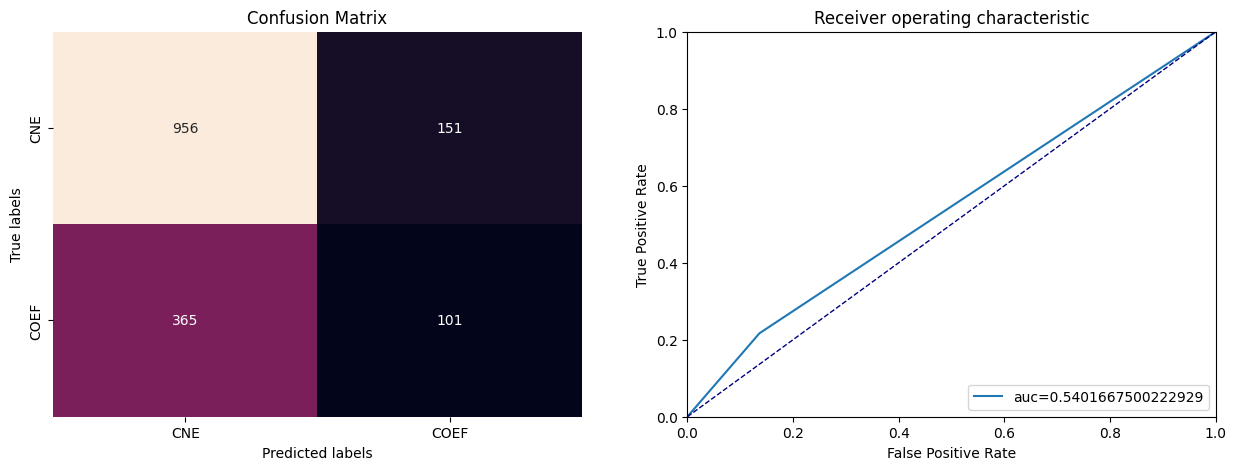

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

SE AGREGAN PARAMETROS PARA PODER OBTENER UN MEJOR PREDICCION DE LOS MODELOS

In [ ]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_parameters = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]
                     
                     }

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf,parameters,xTrain,Ytrain):
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5)
    grid_fit = grid_obj.fit(xTrain,Ytrain)
    best_clf = grid_fit.best_estimator_

    return best_clf


 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.95      0.81      1107
           1       0.40      0.08      0.13       466

    accuracy                           0.69      1573
   macro avg       0.56      0.51      0.47      1573
weighted avg       0.62      0.69      0.61      1573

Area under ROC curve :  0.5140667465329876 



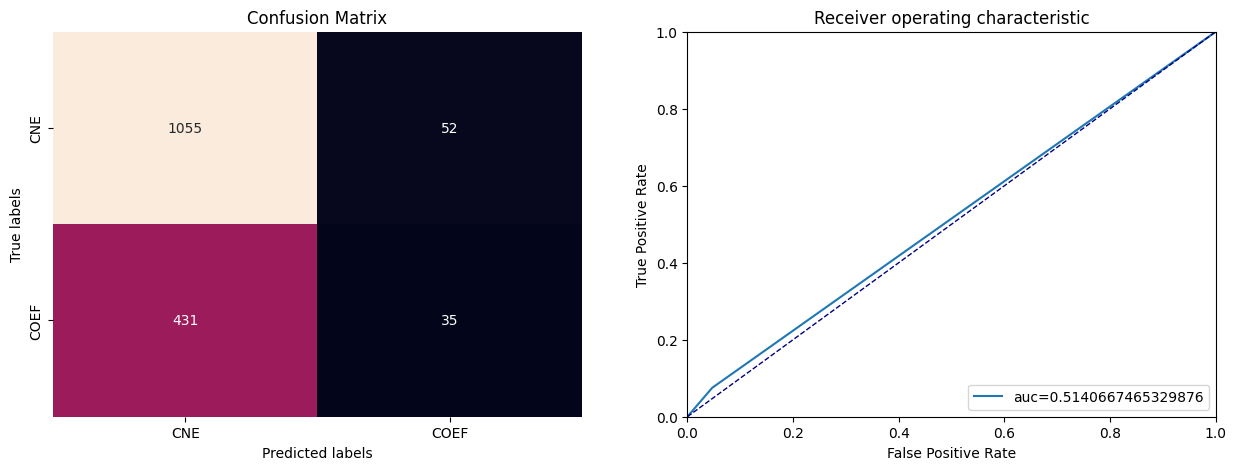

In [ ]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train);
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)

In [ ]:
svm_grid = grid_search(svm_model,SVM_parameters,X_train,y_train);
apply_classifier(svm_grid,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest


 Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.62      0.69      1107
           1       0.40      0.61      0.48       466

    accuracy                           0.61      1573
   macro avg       0.60      0.61      0.59      1573
weighted avg       0.67      0.61      0.63      1573

Area under ROC curve :  0.6133820672970678 



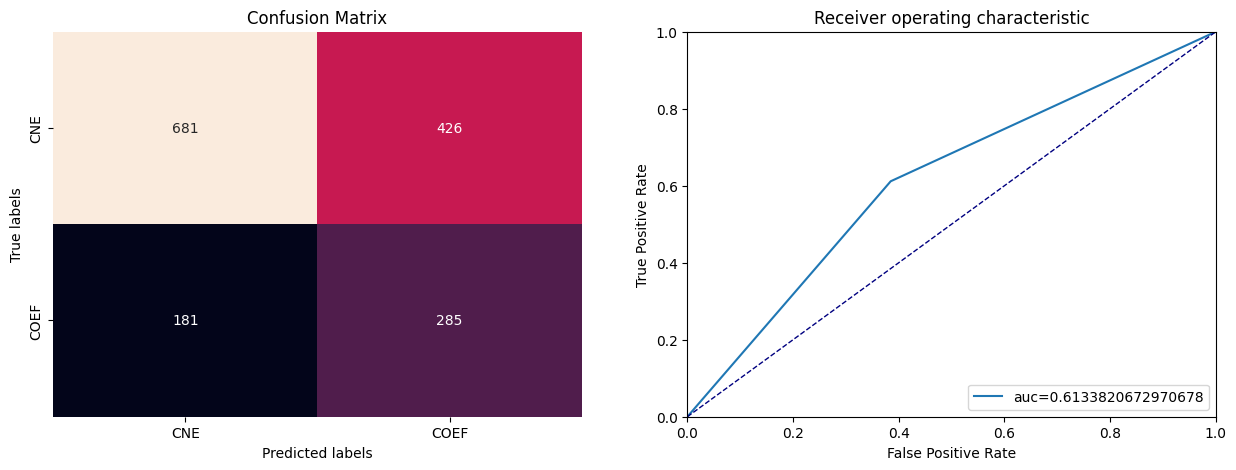

In [ ]:
randomForest_grid = grid_search(random_forest,RandomForest_parameters,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.64      0.70      1107
           1       0.40      0.57      0.47       466

    accuracy                           0.62      1573
   macro avg       0.59      0.60      0.58      1573
weighted avg       0.67      0.62      0.63      1573

Area under ROC curve :  0.6032146194137192 



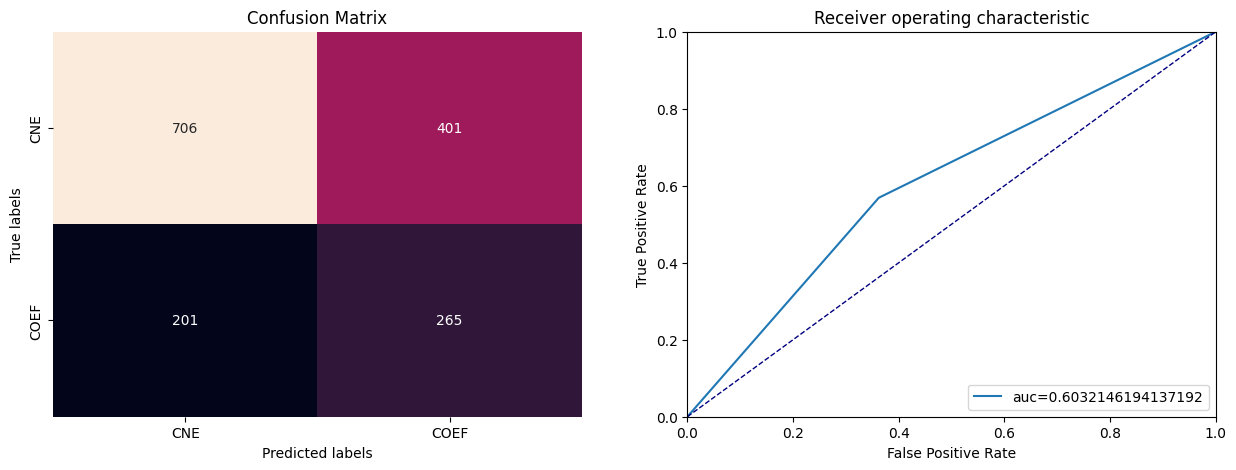

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(base_estimator = randomForest_grid, n_estimators = 4)
apply_classifier(model,X_train, X_test, y_train, y_test)

**BALANCEAMOS LA DATA**

In [ ]:
upsample_data = pd.concat([Cobranza, label], axis=1)

In [ ]:
upsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 1 to 8457
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NRO_VEC_COB   5242 non-null   float64
 1   PDPs_ROTAS    5242 non-null   int64  
 2   ESTADO_PDP    5242 non-null   int64  
 3   NRO_CUOTAS    5242 non-null   float64
 4   HORA          5242 non-null   float64
 5   MORA          5242 non-null   float64
 6   MES_0         5242 non-null   float64
 7   MES_1         5242 non-null   float64
 8   MES_2         5242 non-null   float64
 9   DEUDA_TOTAL   5242 non-null   float64
 10  TIPOCONTACTO  5242 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 491.4 KB


In [ ]:
from sklearn.utils import resample



majority = upsample_data[upsample_data["TIPOCONTACTO"]==0]
minority = upsample_data[upsample_data["TIPOCONTACTO"]==1]

minority_upsampled = resample(minority, replace=True, n_samples=5242) 
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

In [ ]:
upsample_data

,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,HORA,MORA,MES_0,MES_1,MES_2,DEUDA_TOTAL,TIPOCONTACTO
3,1.0,0,0,36.0,19.0,0.0,0.501089,0.445403,0.475786,0.301635,0
4,0.0,0,0,36.0,14.0,0.0,0.692962,0.000000,0.000000,0.499323,0
5,0.0,0,0,36.0,7.0,1.0,0.523061,0.681586,0.000000,0.579607,0
6,0.0,0,0,60.0,16.0,1.0,0.640838,0.652206,0.724445,0.781333,0
7,1.0,0,0,60.0,9.0,1.0,0.523046,0.759128,0.650284,0.462678,0
...,...,...,...,...,...,...,...,...,...,...,...
3451,0.0,0,0,60.0,7.0,1.0,0.777220,0.000000,0.000000,0.859046,1
7608,0.0,0,0,60.0,15.0,1.0,0.131336,0.000000,0.000000,0.582710,1
6404,0.0,0,0,36.0,16.0,1.0,0.400708,0.000000,0.000000,0.440183,1
5101,0.0,0,0,36.0,10.0,1.0,0.672132,0.000000,0.000000,0.918514,1


([<matplotlib.patches.Wedge at 0x7fa14c975250>,
 [Text(-0.30265396036234093, 1.0575445996632913, '0'),
  Text(0.30265405937681117, -1.0575445713267777, '1')],
 [Text(-0.16508397837945868, 0.5768425089072496, '58.9%'),
  Text(0.16508403238735153, -0.5768424934509696, '41.1%')])

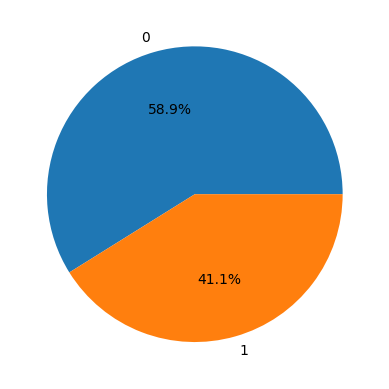

In [ ]:
plt.pie(upsample_data["TIPOCONTACTO"].value_counts(), autopct='%1.1f%%',
         labels=upsample_data["TIPOCONTACTO"].unique())

In [ ]:
upsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 3 to 7968
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NRO_VEC_COB   8904 non-null   float64
 1   PDPs_ROTAS    8904 non-null   int64  
 2   ESTADO_PDP    8904 non-null   int64  
 3   NRO_CUOTAS    8904 non-null   float64
 4   HORA          8904 non-null   float64
 5   MORA          8904 non-null   float64
 6   MES_0         8904 non-null   float64
 7   MES_1         8904 non-null   float64
 8   MES_2         8904 non-null   float64
 9   DEUDA_TOTAL   8904 non-null   float64
 10  TIPOCONTACTO  8904 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 834.8 KB


In [ ]:
label_upsample = upsample_data["TIPOCONTACTO"]
upsample_data.drop("TIPOCONTACTO",inplace = True, axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train_upS.shape[0]))
print("Testing set has {} samples.".format(X_test_upS.shape[0]))

Training set has 6232 samples.
Testing set has 2672 samples.




---




 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.68      0.77      1109
           1       0.81      0.94      0.87      1563

    accuracy                           0.83      2672
   macro avg       0.85      0.81      0.82      2672
weighted avg       0.84      0.83      0.83      2672

Area under ROC curve :  0.8097445607306473 



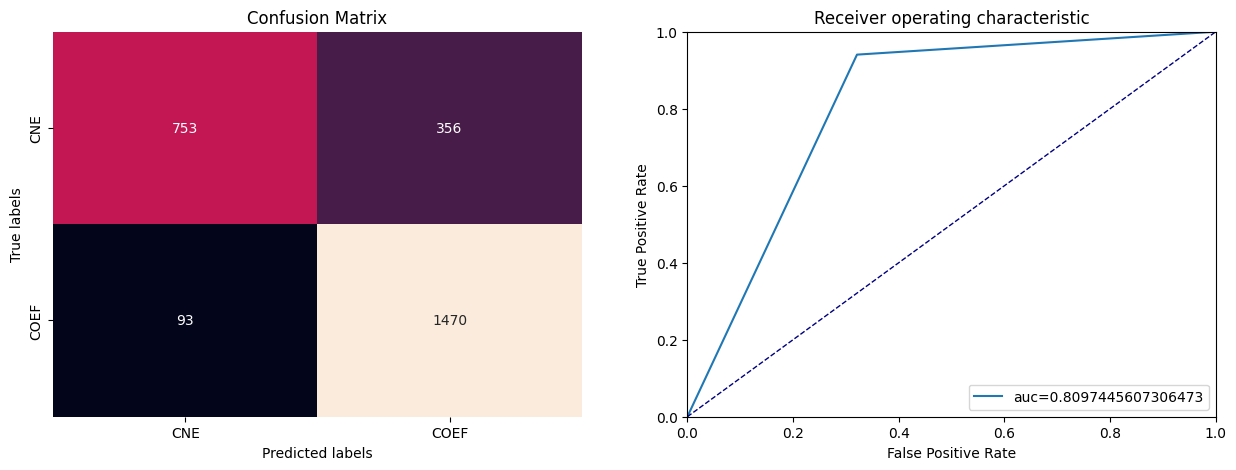

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.28      0.39      1109
           1       0.64      0.89      0.74      1563

    accuracy                           0.64      2672
   macro avg       0.64      0.59      0.57      2672
weighted avg       0.64      0.64      0.60      2672

Area under ROC curve :  0.5858338136124663 



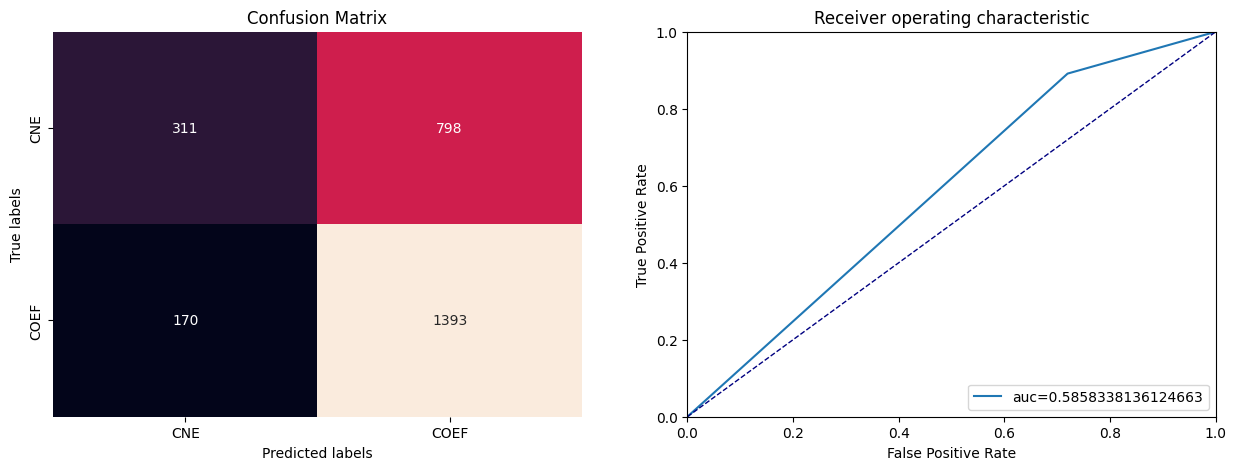

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1109
           1       0.58      1.00      0.74      1563

    accuracy                           0.58      2672
   macro avg       0.29      0.50      0.37      2672
weighted avg       0.34      0.58      0.43      2672

Area under ROC curve :  0.5 



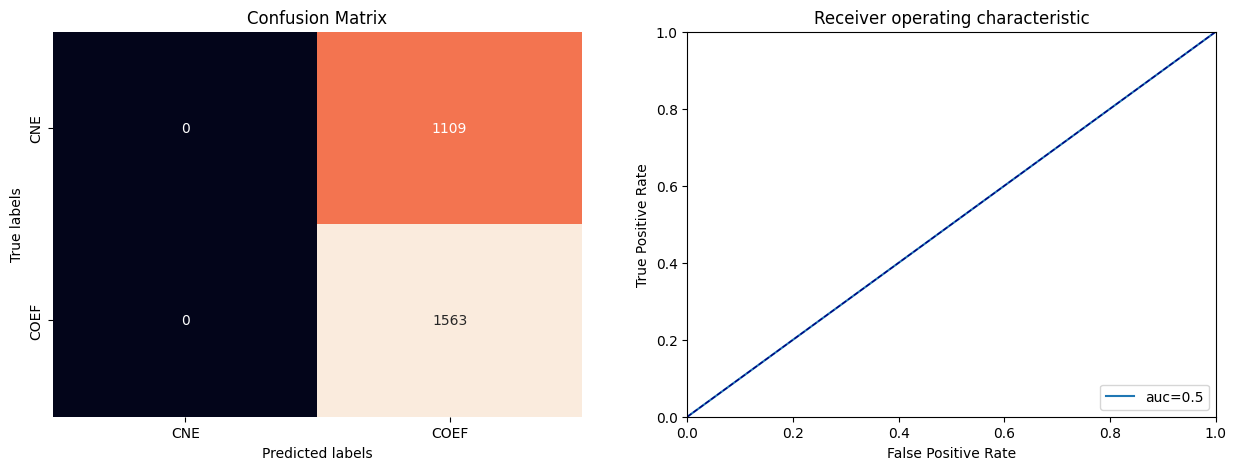

In [ ]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1109
           1       0.83      0.95      0.89      1563

    accuracy                           0.86      2672
   macro avg       0.87      0.84      0.85      2672
weighted avg       0.86      0.86      0.85      2672

Area under ROC curve :  0.8390932214585832 



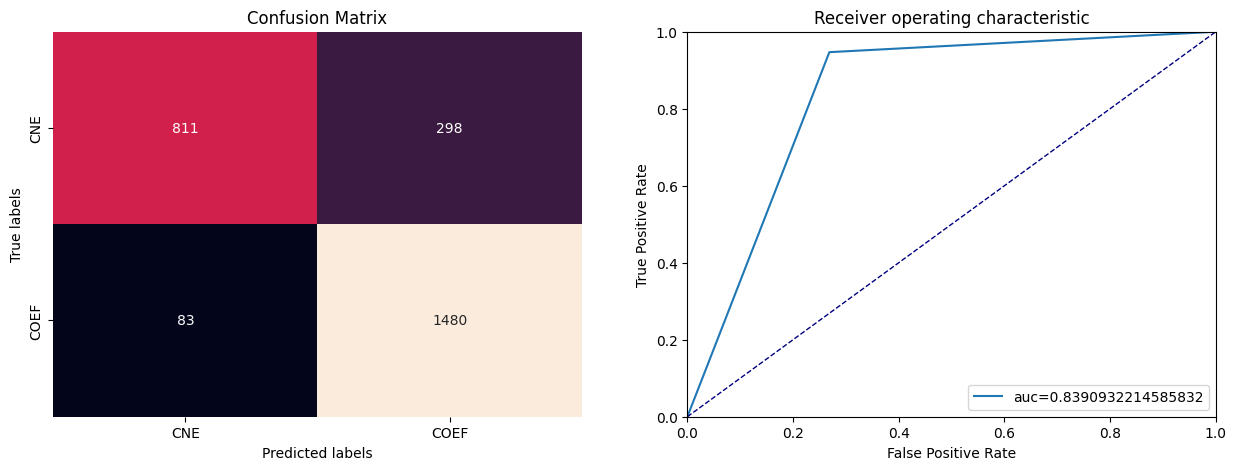

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.63      0.72      1109
           1       0.78      0.91      0.84      1563

    accuracy                           0.80      2672
   macro avg       0.81      0.77      0.78      2672
weighted avg       0.80      0.80      0.79      2672

Area under ROC curve :  0.7728643155200255 



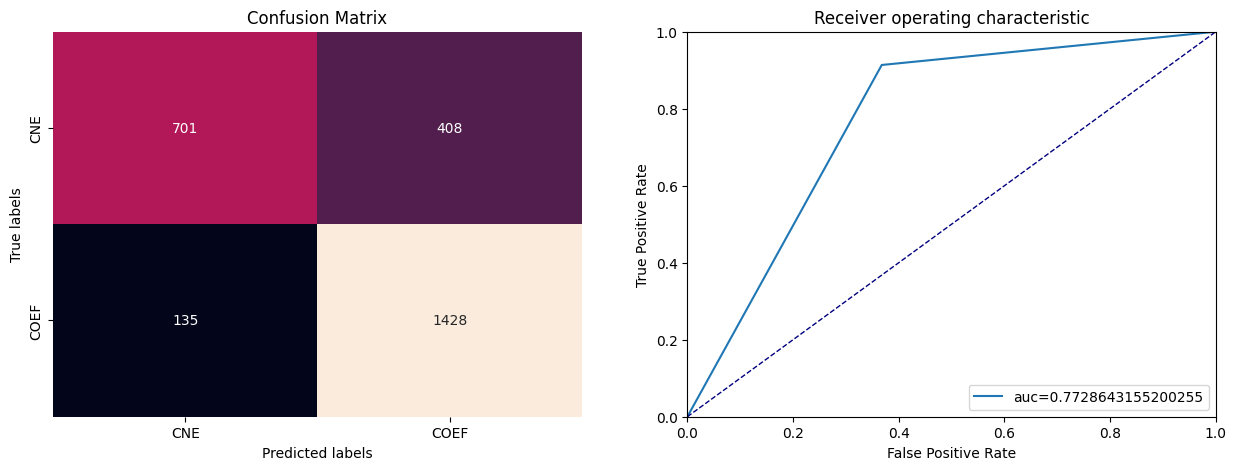

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.70      0.79      1109
           1       0.82      0.94      0.87      1563

    accuracy                           0.84      2672
   macro avg       0.86      0.82      0.83      2672
weighted avg       0.85      0.84      0.84      2672

Area under ROC curve :  0.8219176896756429 



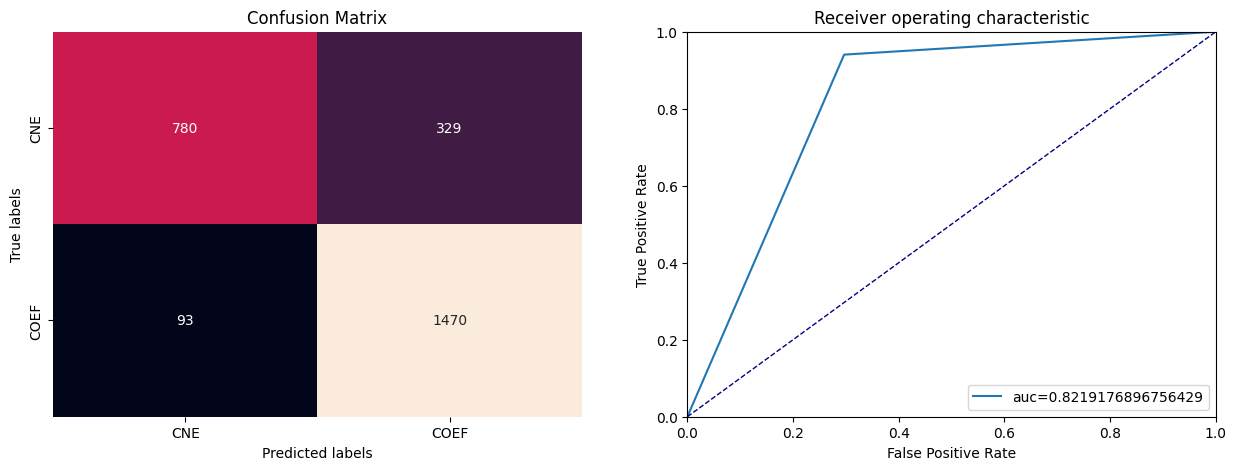

In [ ]:
model = AdaBoostClassifier(base_estimator = random_forest, n_estimators = 4)
apply_classifier(model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)